In [19]:
from IPython.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import os
import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['figure.figsize'] = (12,8)  #시각화 figure default 설정
mpl.rcParams['font.family'] = 'Malgun Gothic' #폰트 디폴트 설정
mpl.rcParams['font.size'] = 10    #폰트 사이즈 디폴트 설정
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format='retina' # 그래프 글씨 뚜렷

In [20]:
import matplotlib.font_manager as fm

# 사용 가능한 폰트 목록 가져오기
font_list = [f.name for f in fm.fontManager.ttflist if 'Gothic' in f.name]
print(font_list)

['Malgun Gothic', 'Yu Gothic', 'MS Gothic', 'Yu Gothic', 'Malgun Gothic', 'Franklin Gothic Medium', 'Yu Gothic', 'Franklin Gothic Medium', 'Yu Gothic', 'Malgun Gothic']


In [21]:
# cur_dir
lca_output_4class_path = os.path.dirname(os.getcwd()) + '\\LCA결과\\tourism_with_4class.csv'

In [22]:
lca_output_4class_path

'c:\\Users\\LeeSeungYong\\myproject\\[공모전] (신한카드상) 2023년 문화관광 데이터분석대회\\tourism\\LCA결과\\tourism_with_4class.csv'

In [23]:
df = pd.read_csv(lca_output_4class_path)
df.head()

,Unnamed: 0,id,RQ1,Q3,Q4,RQ2A2,C총액1인MIS,RDAY평균,Q7,D_BUN,D_SEX,D_AGE,체류1순위,체류2순위,D_NAT_CLUST,만족한활동,class
0,1,289,4,2,1,12,3,2,5,1,1,2,서울일TOT,없음,유럽,4,2
1,2,306,1,3,1,2,3,4,4,1,1,5,부산일TOT,없음,기타,14,4
2,3,324,1,2,1,11,1,1,5,1,1,2,서울일TOT,없음,동아시아,2,2
3,4,327,1,1,1,12,3,2,5,1,1,5,서울일TOT,없음,기타,4,1
4,5,328,1,3,1,2,3,4,4,1,1,5,부산일TOT,없음,기타,1,4


In [24]:
df.drop('Unnamed: 0' , axis = 1 , inplace = True)
columns = ['ID', '방한횟수','목적','형태','방문기간','1인지출경비','1day경비' , '만족도','분기별','성별','나이','체류1순위', '체류2순위','대륙','만족활동','클래스']
df.columns = columns

In [25]:
df['방한횟수'] = df['방한횟수'].map({1: '1회', 2: '2회', 3: '3회', 4: '4회 이상'})
df['목적'] = df['목적'].map({1: '여가/위락/휴식', 2: '친구/친지 방문', 3: '비즈니스', 4: '교육' , 5: '종교' ,6: '기타' })
df['형태'] = df['형태'].map({1: '개별여행', 2: 'AIR-TEL', 3: '단체여행'})
df['방문기간'] = df['방문기간'].map({1: '1-3일', 2: '4-7일', 3: '8-10일' , 11:'11-30일', 12:'31-60일'})
df['1인지출경비'] = df['1인지출경비'].map({1: '$1000이하', 2: '$1000-2000이하', 3: '$2000-3000이하' , 4:'$3000-4000이하', 5:'$5000-10000이하', 6:'$10000초과', 98:'최대금액초과'})
df['1day경비'] = df['1day경비'].map({1: '$50이하', 2: '$50-100이하', 3: '$100-300이하' , 4:'$300-5000이하', 5:'$500초과'})
df['만족도'] = df['만족도'].map({1: '매우불만족', 2: '대체로불만족', 3: '보통', 4: '대체로만족', 5: '매우만족'})
df['분기별'] = df['분기별'].map({1: '1분기', 2: '2분기', 3: '3분기', 4: '4분기'})
df['성별'] = df['성별'].map({1: '남성', 2: '여성'})
df['나이'] = df['나이'].map({1: '15-20세', 2: '21-30세', 3: '31-40세', 4: '41-50세' ,5: '51-60세', 6: '61세이상'}) 

In [26]:
df['만족활동'] = df['만족활동'].map({
    1: '식도락관광',
    2: '쇼핑',
    3: '자연경관감상',
    4: '역사문화체험',
    5: '전통문화체험',
    6: '박물관,전시관',
    7: 'K-POP컨텐츠체험',
    8: '드라마영화촬영지방문',
    9: '연극,뮤지컬 관람',
    10: '지역축제참여',
    11: '유흥/오락',
    12: '의료관광',
    13: '스포츠관람',
    14: '업무수행',
    15: '연구/교육',
    16: '시찰',
    17: '기타'
})

In [27]:
df_class1  =df.loc[df['클래스']==1]
df_class2  =df.loc[df['클래스']==2]
df_class3  =df.loc[df['클래스']==3]
df_class4  =df.loc[df['클래스']==4]

In [28]:
df.head()

,ID,방한횟수,목적,형태,방문기간,1인지출경비,1day경비,만족도,분기별,성별,나이,체류1순위,체류2순위,대륙,만족활동,클래스
0,289,4회 이상,친구/친지 방문,개별여행,31-60일,$2000-3000이하,$50-100이하,매우만족,1분기,남성,21-30세,서울일TOT,없음,유럽,역사문화체험,2
1,306,1회,비즈니스,개별여행,4-7일,$2000-3000이하,$300-5000이하,대체로만족,1분기,남성,51-60세,부산일TOT,없음,기타,업무수행,4
2,324,1회,친구/친지 방문,개별여행,11-30일,$1000이하,$50이하,매우만족,1분기,남성,21-30세,서울일TOT,없음,동아시아,쇼핑,2
3,327,1회,여가/위락/휴식,개별여행,31-60일,$2000-3000이하,$50-100이하,매우만족,1분기,남성,51-60세,서울일TOT,없음,기타,역사문화체험,1
4,328,1회,비즈니스,개별여행,4-7일,$2000-3000이하,$300-5000이하,대체로만족,1분기,남성,51-60세,부산일TOT,없음,기타,식도락관광,4


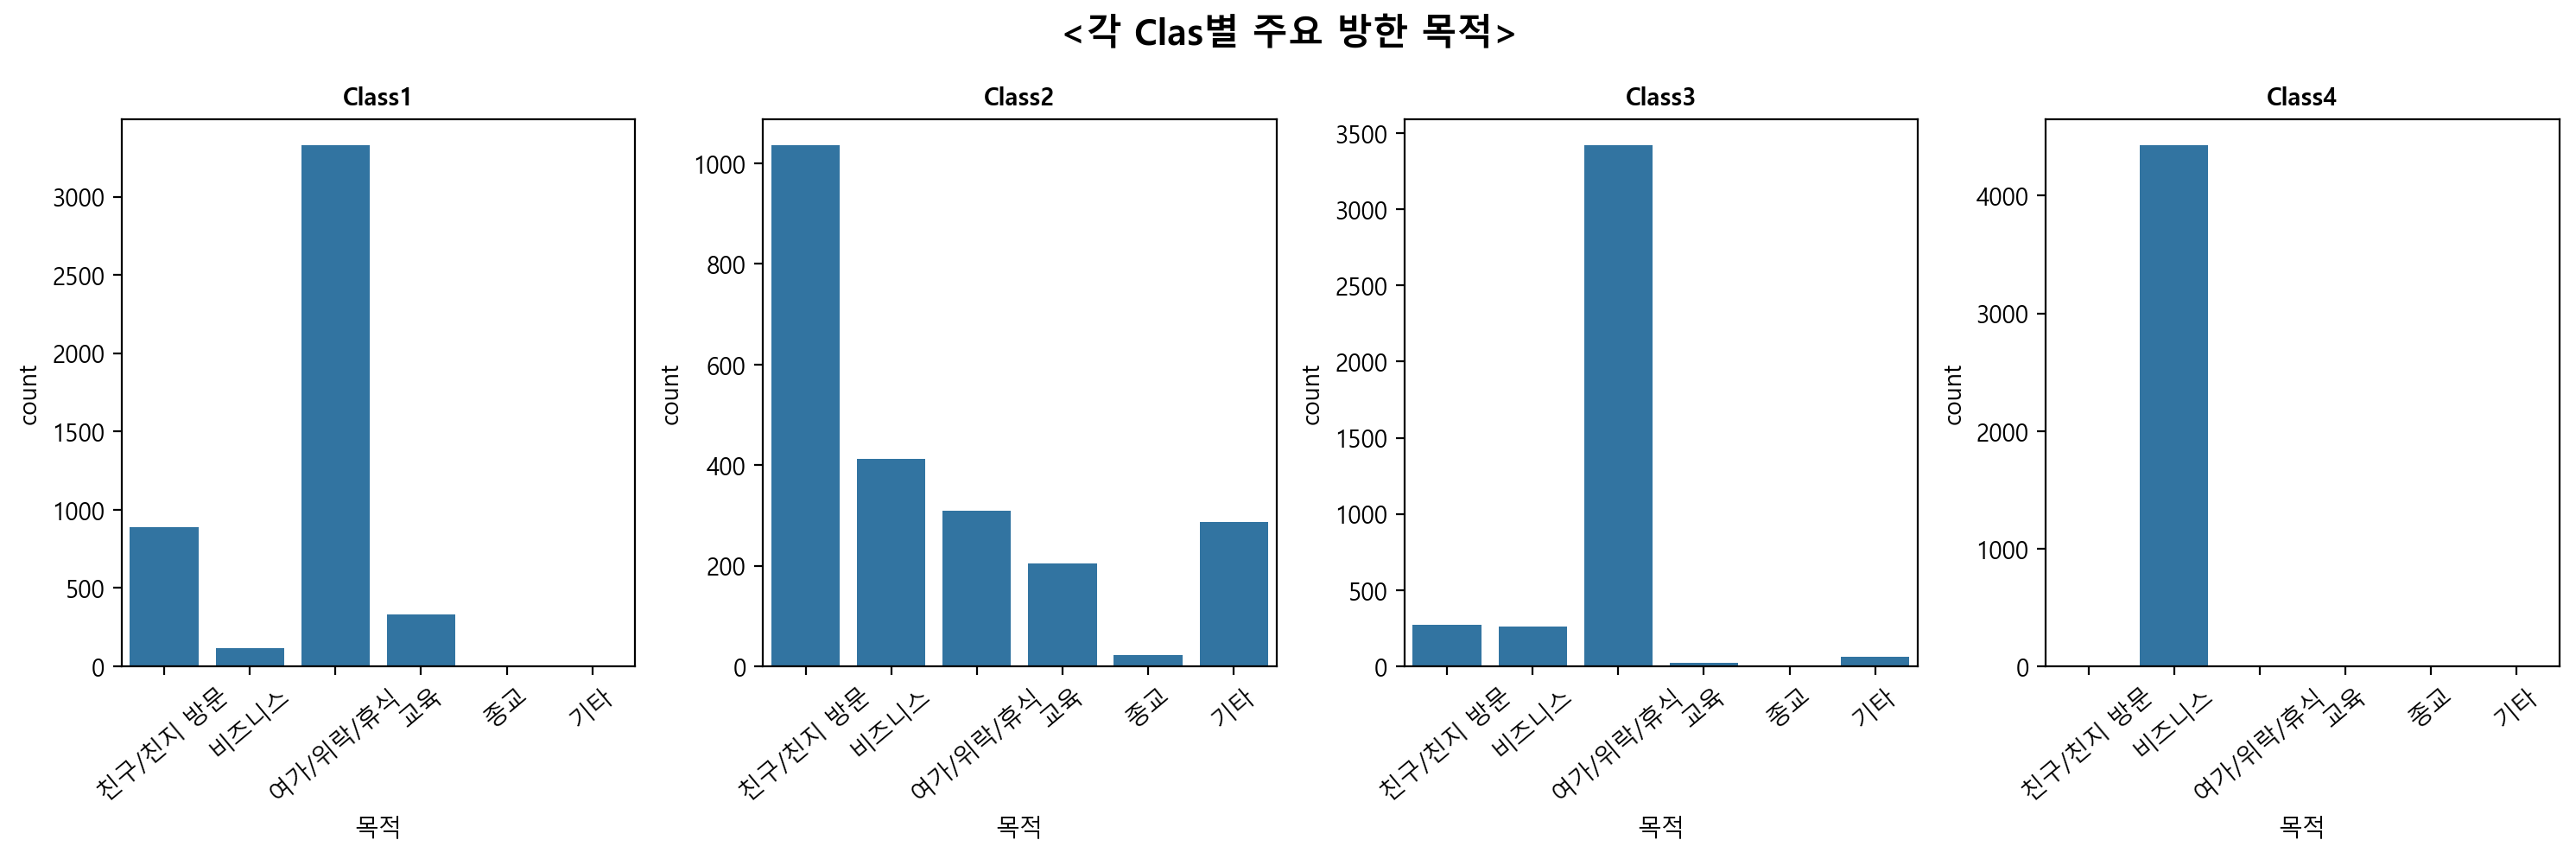

In [29]:
# 목적별 비교 
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,5), sharex=True)
df_order = df['목적'].unique()
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
ax4 = axes[3]


sns.countplot(x='목적', data=df_class1, order=df_order, ax=axes[0])
axes[0].set_title('Class1', fontsize = 10, fontweight = 'semibold')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 40)

sns.countplot(x='목적', data=df_class2, order=df_order, ax=axes[1])
axes[1].set_title('Class2', fontsize = 10, fontweight = 'semibold')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 40)

sns.countplot(x='목적', data=df_class3, order=df_order, ax=axes[2])
axes[2].set_title('Class3', fontsize = 10, fontweight = 'semibold')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation = 40)

sns.countplot(x='목적', data=df_class4, order=df_order, ax=axes[3])
axes[3].set_title('Class4', fontsize = 10, fontweight = 'semibold')
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation = 40)

plt.suptitle("<각 Clas별 주요 방한 목적>", fontsize = 15, fontweight = 'semibold')
plt.tight_layout()
plt.savefig("각 Class별 방문 목적.png")
plt.show()

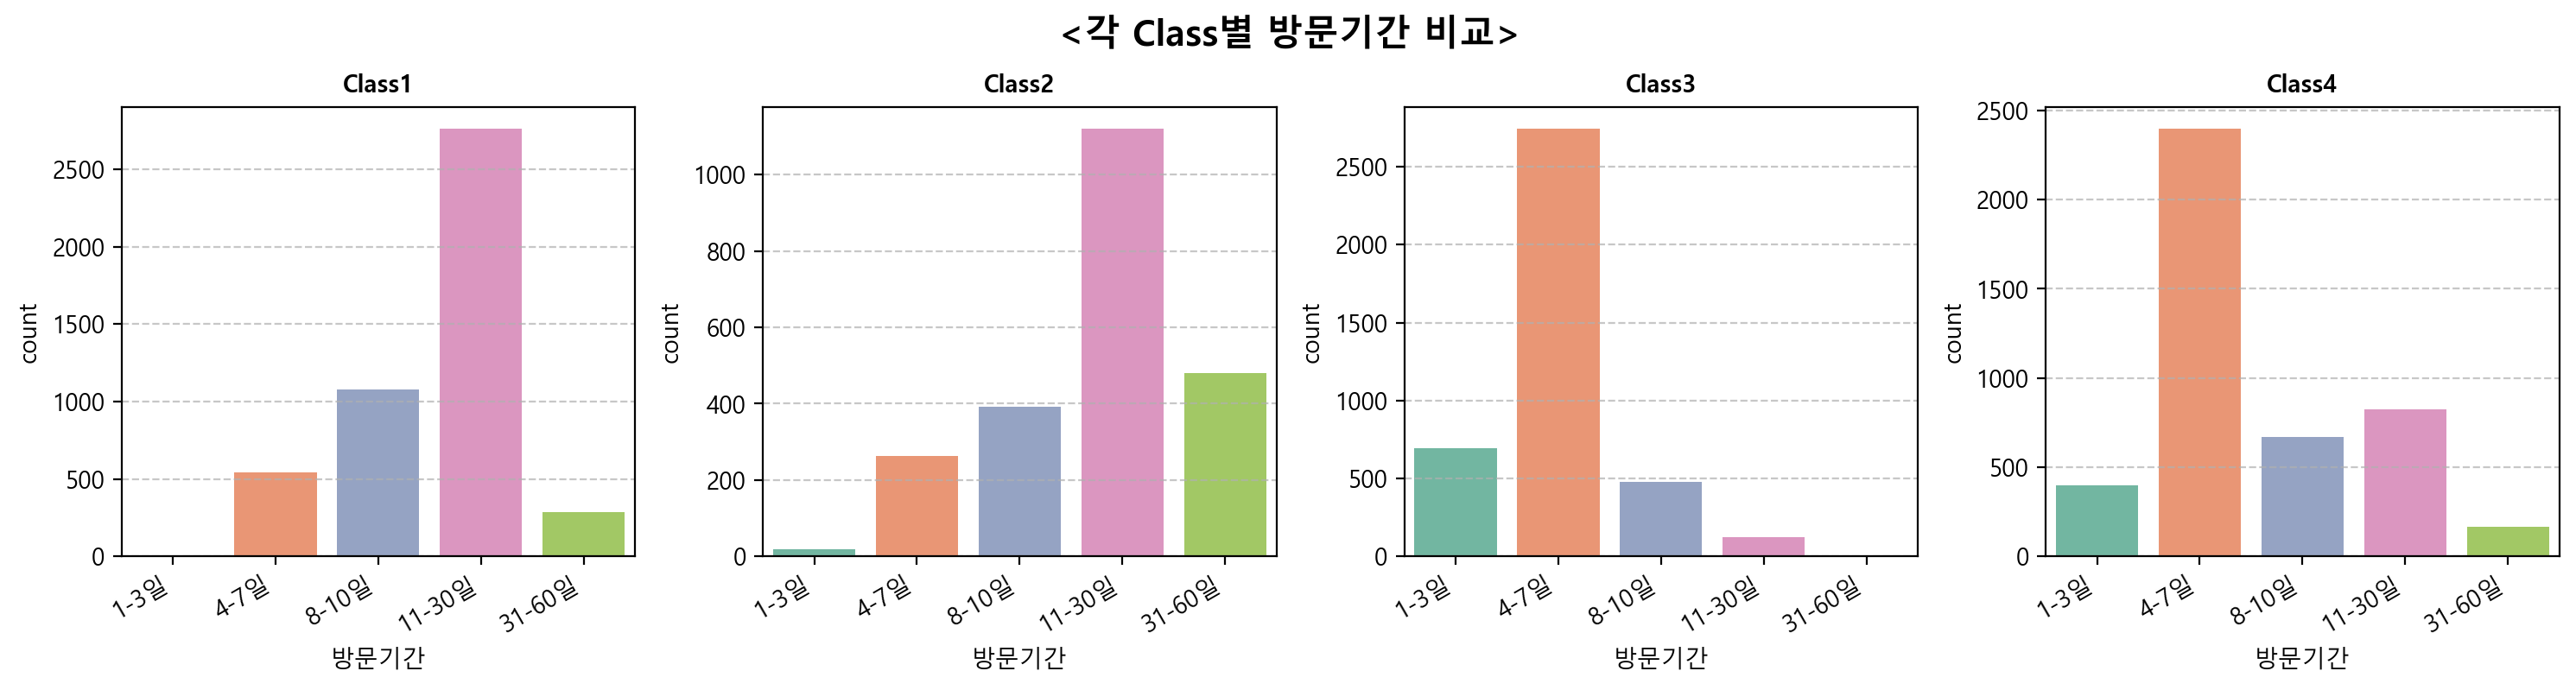

In [30]:
# 방문기간별 비교 
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,4), sharex=True)
df_order = ['1-3일', '4-7일', '8-10일', '11-30일', '31-60일']
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
ax4 = axes[3]

# 색상 지정
palette = sns.color_palette("Set2")

sns.countplot(x='방문기간', data=df_class1, order=df_order, ax=axes[0], palette=palette)
axes[0].set_title('Class1', fontsize=10, fontweight='semibold')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30, ha='right')  # x축 레이블 회전

sns.countplot(x='방문기간', data=df_class2, order=df_order, ax=axes[1], palette=palette)
axes[1].set_title('Class2', fontsize=10, fontweight='semibold')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=30, ha='right')  # x축 레이블 회전

sns.countplot(x='방문기간', data=df_class3, order=df_order, ax=axes[2], palette=palette)
axes[2].set_title('Class3', fontsize=10, fontweight='semibold')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=30, ha='right')  # x축 레이블 회전

sns.countplot(x='방문기간', data=df_class4, order=df_order, ax=axes[3], palette=palette)
axes[3].set_title('Class4', fontsize=10, fontweight='semibold')
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=30, ha='right')  # x축 레이블 회전

# 각 subplot에 그리드 추가
for ax in axes:
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.suptitle("<각 Class별 방문기간 비교>", fontsize=15, fontweight='semibold')
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # 제목과 subplot 간격 조정
plt.savefig("각 Class별 방문기간 비교.png")
plt.show()


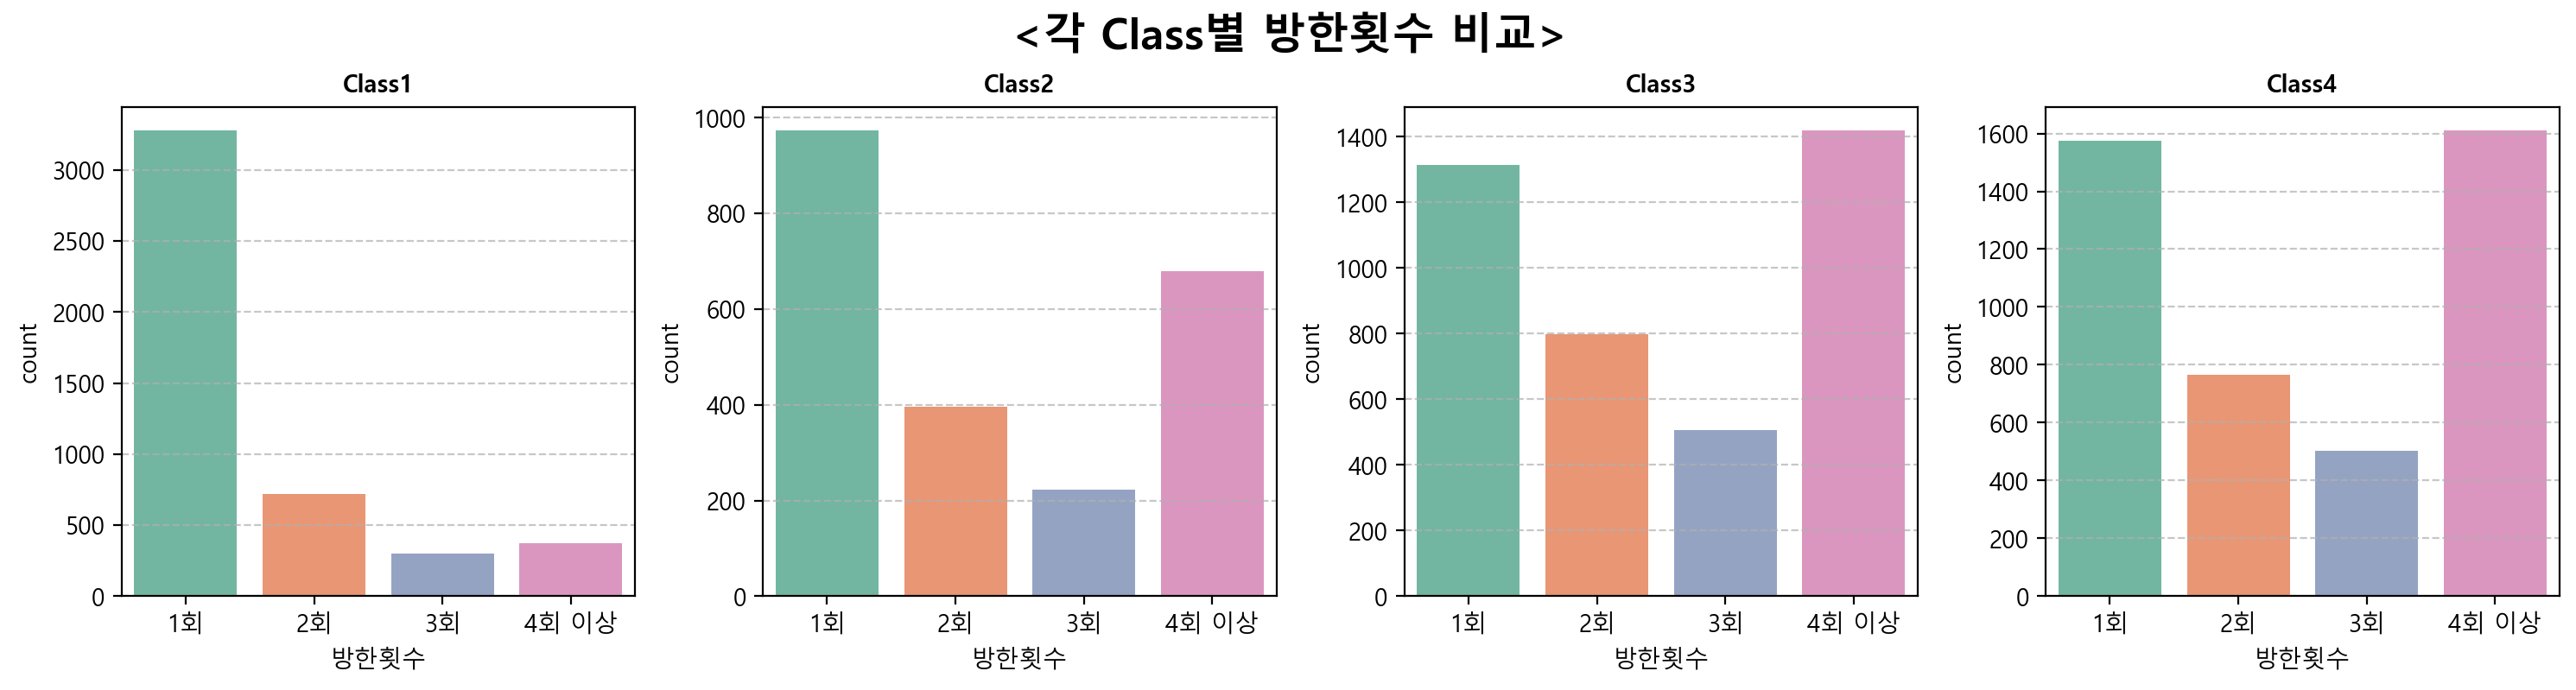

In [31]:
# 방한횟수별 비교
df_order = ['1회', '2회', '3회', '4회 이상']

# 그림과 축 생성
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,4), sharex=True)

# 색상 지정
palette = sns.color_palette("Set2")

ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
ax4 = axes[3]

# 각 클래스에 대해 countplot 생성
sns.countplot(x='방한횟수', data=df_class1, order=df_order, ax=ax1, palette=palette)
ax1.set_title('Class1', fontsize=10, fontweight='semibold')

sns.countplot(x='방한횟수', data=df_class2, order=df_order, ax=ax2, palette=palette)
ax2.set_title('Class2', fontsize=10, fontweight='semibold')

sns.countplot(x='방한횟수', data=df_class3, order=df_order, ax=ax3, palette=palette)
ax3.set_title('Class3', fontsize=10, fontweight='semibold')

sns.countplot(x='방한횟수', data=df_class4, order=df_order, ax=ax4, palette=palette)
ax4.set_title('Class4', fontsize=10, fontweight='semibold')

# 각 subplot에 그리드 추가
for ax in axes:
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# 전체 제목 추가
plt.suptitle("<각 Class별 방한횟수 비교>", fontsize=18, fontweight='semibold')

# 레이아웃 조정
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # 제목과 subplot 간격 조정

# 결과 저장 및 표시
plt.savefig("각 Class별 방한횟수 비교.png")
plt.show()

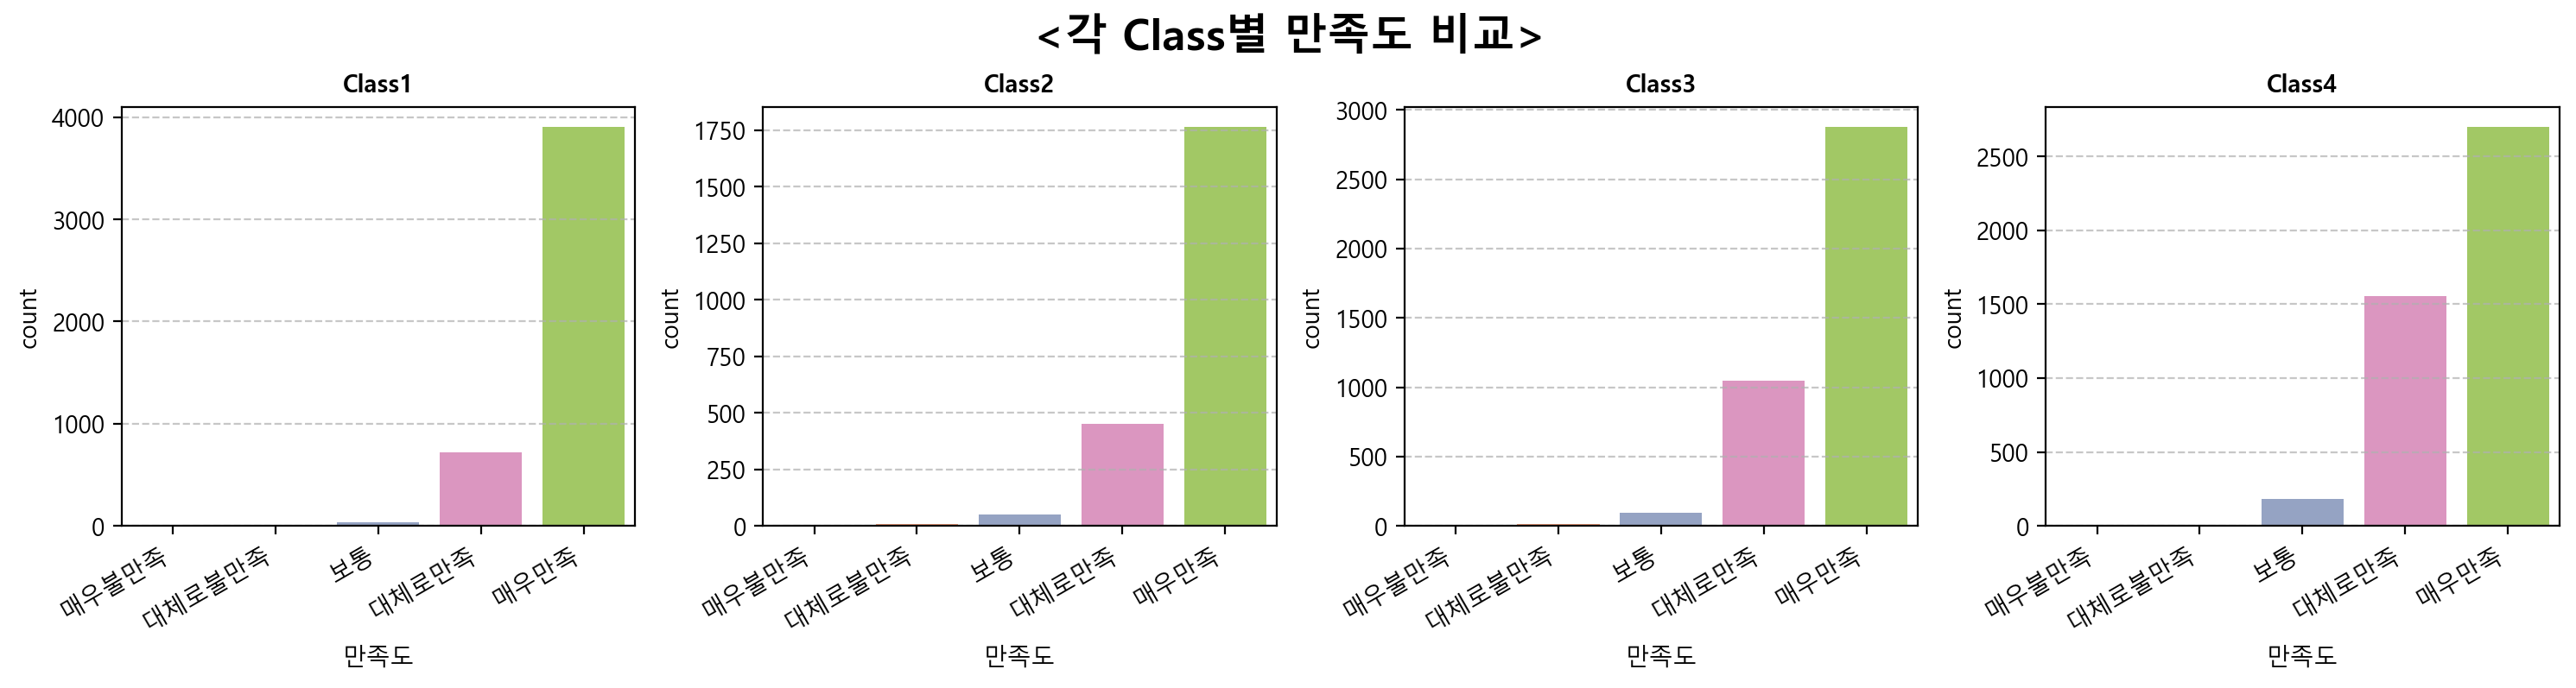

In [32]:
# 만족도별 비교
df_order = ['매우불만족', '대체로불만족', '보통', '대체로만족', '매우만족']

# 그림과 축 생성
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,4), sharex=True)

# 색상 지정
palette = sns.color_palette("Set2")

# 각 subplot을 위한 그래프 생성
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
ax4 = axes[3]

# 각 클래스에 대해 countplot 생성
sns.countplot(x='만족도', data=df_class1, order=df_order, ax=ax1, palette=palette)
ax1.set_title('Class1', fontsize=10, fontweight='semibold')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')  # x축 레이블 회전

sns.countplot(x='만족도', data=df_class2, order=df_order, ax=ax2, palette=palette)
ax2.set_title('Class2', fontsize=10, fontweight='semibold')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, ha='right')  # x축 레이블 회전

sns.countplot(x='만족도', data=df_class3, order=df_order, ax=ax3, palette=palette)
ax3.set_title('Class3', fontsize=10, fontweight='semibold')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=30, ha='right')  # x축 레이블 회전

sns.countplot(x='만족도', data=df_class4, order=df_order, ax=ax4, palette=palette)
ax4.set_title('Class4', fontsize=10, fontweight='semibold')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=30, ha='right')  # x축 레이블 회전

# 각 subplot에 그리드 추가
for ax in axes:
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# 전체 제목 추가
plt.suptitle("<각 Class별 만족도 비교>", fontsize=18, fontweight='semibold')

# 레이아웃 조정
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # 제목과 subplot 간격 조정

# 결과 저장 및 표시
plt.savefig("각 Class별 만족도 비교.png")
plt.show()

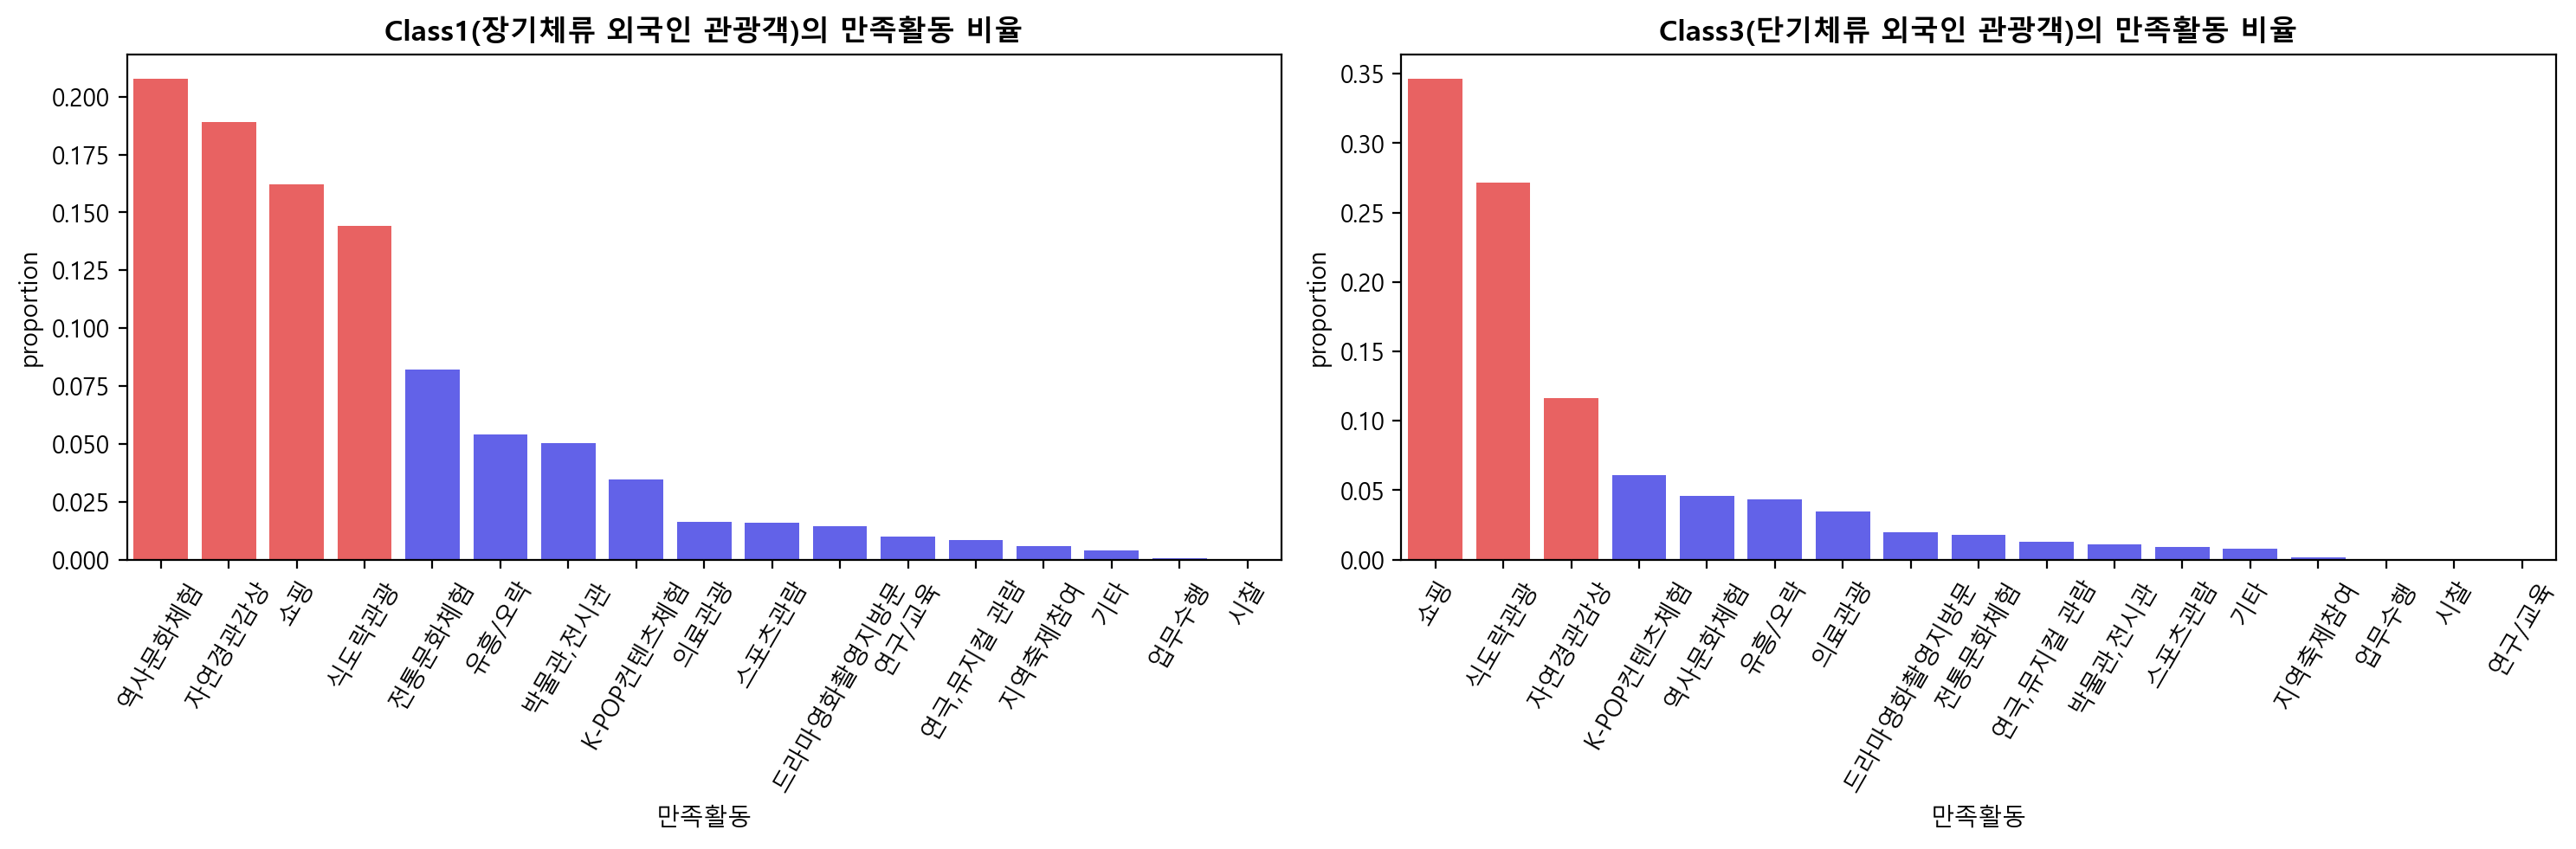

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5), sharex=False, sharey=False)
ax1 = axes[0]
ax2 = axes[1]

df_class1_norm = df_class1['만족활동'].value_counts(normalize=True).reset_index()
df_class3_norm = df_class3['만족활동'].value_counts(normalize=True).reset_index()

sns.barplot(
    data=df_class1_norm, 
    x = '만족활동',
    y='proportion', 
    ax=ax1, 
    palette=['r' if row['proportion'] > 0.1 else 'b' for _, row in df_class1_norm.iterrows()],
    alpha=0.7
)
ax1.set_title('Class1(장기체류 외국인 관광객)의 만족활동 비율', fontsize=12, fontweight='semibold')  # 타이틀 추가
current_x_tick_label = ax1.get_xticklabels()
ax1.set_xticklabels(current_x_tick_label, rotation=60)

sns.barplot(
    data=df_class3_norm, 
    x = '만족활동',
    y='proportion', 
    ax=ax2, 
    palette=['r' if row['proportion'] > 0.1 else 'b' for _, row in df_class3_norm.iterrows()],
    alpha=0.7
)
ax2.set_title('Class3(단기체류 외국인 관광객)의 만족활동 비율', fontsize=12, fontweight='semibold')  # 타이틀 추가
current_x_tick_label = ax2.get_xticklabels()
ax2.set_xticklabels(current_x_tick_label, rotation=60)

plt.tight_layout()
plt.show()

In [34]:
df_class1[['체류1순위', '체류2순위']].groupby(['체류1순위', '체류2순위']).size().reset_index()

,체류1순위,체류2순위,0
0,경기일TOT,부산일TOT,1
1,경남일TOT,대구일TOT,1
2,경남일TOT,부산일TOT,1
3,경남일TOT,제주일TOT,1
4,대구일TOT,부산일TOT,6
5,대구일TOT,없음,1
6,대전일TOT,광주일TOT,1
7,대전일TOT,부산일TOT,1
8,서울일TOT,강원일TOT,227
9,서울일TOT,경기일TOT,178


In [35]:
df_class1['체류1순위'].value_counts().reset_index()

,체류1순위,count
0,서울일TOT,4646
1,제주일TOT,8
2,대구일TOT,7
3,경남일TOT,3
4,대전일TOT,2
5,충남일TOT,2
6,울산일TOT,1
7,경기일TOT,1


In [36]:
df_class1['체류2순위'].value_counts().reset_index()

,체류2순위,count
0,없음,1584
1,부산일TOT,1447
2,제주일TOT,686
3,강원일TOT,227
4,경기일TOT,178
5,인천일TOT,131
6,경북일TOT,116
7,대구일TOT,61
8,경남일TOT,52
9,전북일TOT,43


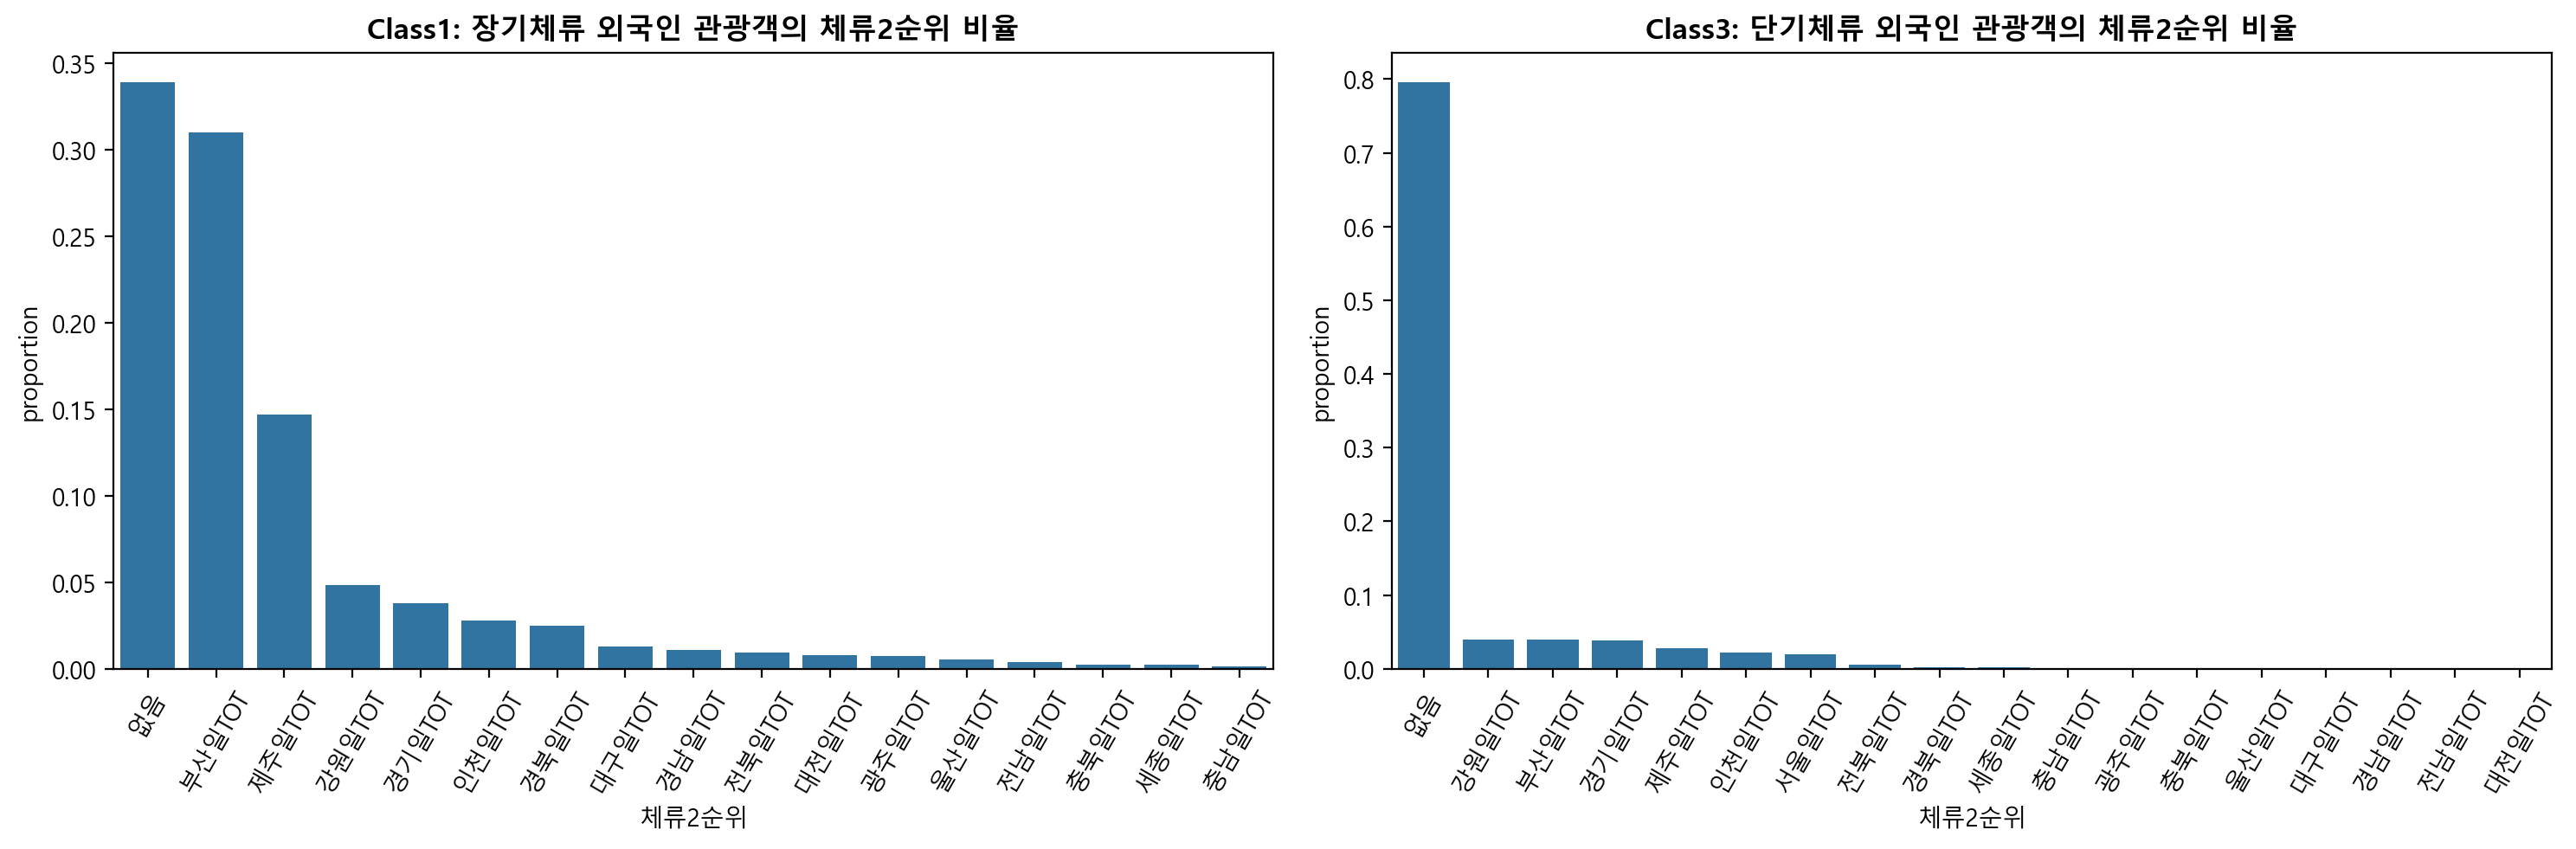

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5), sharex=False, sharey=False)
ax1, ax2 = axes.flatten()

# 체류2순위에 대한 비율을 계산
df_class1_norm = df_class1['체류2순위'].value_counts(normalize=True).reset_index()
df_class3_norm = df_class3['체류2순위'].value_counts(normalize=True).reset_index()

# Class1 그래프
sns.barplot(
    data=df_class1_norm, 
    x='체류2순위', 
    y='proportion', 
    ax=ax1, 
)
ax1.set_title('Class1: 장기체류 외국인 관광객의 체류2순위 비율', fontsize=12, fontweight='semibold')  # 타이틀 수정
current_x_tick_label = ax1.get_xticklabels()
ax1.set_xticklabels(current_x_tick_label, rotation=60)

# Class3 그래프
sns.barplot(
    data=df_class3_norm, 
    x='체류2순위', 
    y='proportion', 
    ax=ax2, 
)
ax2.set_title('Class3: 단기체류 외국인 관광객의 체류2순위 비율', fontsize=12, fontweight='semibold')  # 타이틀 수정
current_x_tick_label = ax2.get_xticklabels()
ax2.set_xticklabels(current_x_tick_label, rotation=60)

plt.tight_layout()
plt.show()